# NAGIREDDY YAMINI - 19A1HP021

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [4]:
adv = pd.read_csv(r'Advertising.csv')

#Reads data into pandas dataframe

In [5]:
adv.info()

#Gives information about the datatypes found in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [6]:
adv = adv.dropna()

#Drops missing values from the dataset

In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        197 non-null    int64  
 1   TV         197 non-null    float64
 2   Radio      197 non-null    float64
 3   Newspaper  197 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      197 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.8+ KB


In [8]:
adv['Day'].unique()

#Identify the column containing categorical variables

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [9]:
pd.get_dummies(adv['Day'])[0:5]

#Assign dummy variables to the data and print top 15 rows

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
categorical_features = ['Day']

In [11]:
X_features = adv.columns
print(X_features)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day', 'Sales'], dtype='object')


In [12]:
X_features = X_features.drop('Sales')

In [13]:
print(X_features)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day'], dtype='object')


In [14]:
adv_encoded = pd.get_dummies(adv[X_features], columns = categorical_features)

In [15]:
print(adv_encoded.columns)

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Day_Holiday', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')


In [16]:
adv.describe()

#Descriptive summary of all numerical variables

,Sno,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030
std,57.818691,85.439138,14.922793,20.972370,5.192302
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,52.000000,74.700000,9.900000,12.900000,10.400000
50%,102.000000,149.700000,22.300000,25.900000,12.900000
75%,151.000000,218.400000,36.500000,45.100000,17.400000
max,200.000000,296.400000,49.600000,100.900000,27.000000


In [17]:
#Importing visualization packages
import seaborn as sn
import matplotlib.pyplot as plt

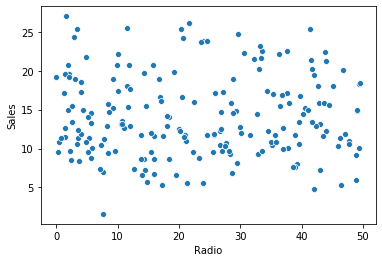

In [18]:
sn.scatterplot(x = 'Radio', y = 'Sales', data = adv) 

#Scatterplot for TV and Sales

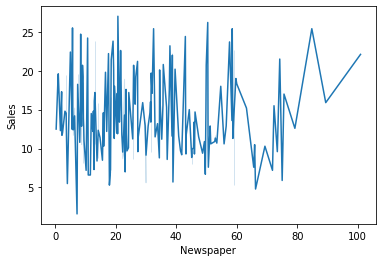

In [19]:
sn.lineplot(x = "Newspaper", y = "Sales", data = adv)
plt.show()  

#Line Plot for Radio and Sales

In [22]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant( adv_encoded )
Y = adv['Sales']
train_X, test_X, train_y, test_y = train_test_split( X, Y, train_size = 0.7, test_size = 0.3, random_state = 86 )

#Adding constand term to matrix of features, splitting dataset into training and test dataset

In [25]:
adv_model_1 = sm.OLS(train_y, train_X).fit()
adv_model_1.summary2()

#Model fitting and understanding the summary of the model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     -0.009  
Dependent Variable: Sales            AIC:                837.1175
Date:               2020-08-12 00:00 BIC:                857.5574
No. Observations:   137              Log-Likelihood:     -411.56 
Df Model:           6                F-statistic:        0.7969  
Df Residuals:       130              Prob (F-statistic): 0.574   
R-squared:          0.035            Scale:              25.096  
------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const           7.0701    1.7206  4.1090  0.0001   3.6660  10.4741
Sno             0.0074    0.0077  0.9599  0.3389  -0.0078   0.0225
TV              0.0109    0.0075  1.4486  0.1499  -0.0040   0.0257
Radio           0.0276    0.0318  0.8664  0.3879  -0.0354   0.0905
Newspaper       0.0088    0.0233  0.3762  0.7074  -0.0374   0.0550
Day_Holiday     0.1748    2.7784  0.0629  0.9499  -5.3220   5.6715
Day_Weekdays    4.0113    1.0406  3.8549  0.0002   1.9526   6.0699
Day_Weekend     2.8840    1.3826  2.0860  0.0389   0.1488   5.6193
-----------------------------------------------------------------
Omnibus:          5.400   Durbin-Watson:      1.830              
Prob(Omnibus):    0.067   Jarque-Bera (JB):   4.318              
Skew:             0.327   Prob(JB):           0.115              
Kurtosis:         2.427   Condition No.:      2913150788938797568
=================================================================
* The condition number is large (3e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [26]:
# Multicollinearity Test

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X[:].to_numpy()
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

#creating VIF calculations

In [53]:
vif_factors = get_vif_factors( X[adv_encoded.columns] )
vif_factors

#Calculating VIF for the list of columns

,column,vif
0,Sno,1.044105
1,TV,1.981276
2,Radio,1.159367
3,Newspaper,1.187723
4,Day_Holiday,1.616170
5,Day_Weekdays,8.979078
6,Day_Weekend,6.191954


In [54]:
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column

#Removing columns with VIF > 4

In [55]:
print(columns_with_large_vif)

5    Day_Weekdays
6     Day_Weekend
Name: column, dtype: object


In [56]:
columns_to_be_removed = ['Day_Weekdays']

#Choosing Day_Weekdays column as it is redundant

In [57]:
X_new_features = list( set(adv_encoded) - set(columns_to_be_removed) )

#Removing Day_Weekday column as it is redundant

In [58]:
print(X_new_features)

['Day_Holiday', 'Sno', 'TV', 'Day_Weekend', 'Radio', 'Newspaper']


In [59]:
# Model after eliminating multicollinearity

In [60]:
train_X = train_X[X_new_features]
adv_model_2 = sm.OLS(train_y, train_X).fit()
adv_model_2.summary2()

#Model fitting after VIF and removing redundant variable

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.842   
Dependent Variable:     Sales            AIC:                         881.9334
Date:                   2020-08-12 17:35 BIC:                         899.4533
No. Observations:       137              Log-Likelihood:              -434.97 
Df Model:               6                F-statistic:                 122.8   
Df Residuals:           131              Prob (F-statistic):          2.70e-51
R-squared (uncentered): 0.849            Scale:                       35.050  
---------------------------------------------------------------------------------
                   Coef.     Std.Err.       t       P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Day_Holiday       -7.5761      4.3137    -1.7563    0.0814    -16.1096     0.9574
Sno                0.0382      0.0075     5.0595    0.0000      0.0233     0.0531
TV                 0.0413      0.0074     5.6174    0.0000      0.0268     0.0559
Day_Weekend       -4.2543      1.6353    -2.6016    0.0103     -7.4893    -1.0193
Radio              0.1120      0.0350     3.1997    0.0017      0.0427     0.1812
Newspaper          0.0543      0.0266     2.0420    0.0432      0.0017     0.1068
------------------------------------------------------------------------------
Omnibus:                   3.383            Durbin-Watson:               1.935
Prob(Omnibus):             0.184            Jarque-Bera (JB):            3.126
Skew:                      0.296            Prob(JB):                    0.209
Kurtosis:                  2.557            Condition No.:               1712 
==============================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [61]:
# Residual analysis

In [62]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();
    
# PP Plot for checking normality assumption of residuals

<Figure size 576x432 with 0 Axes>

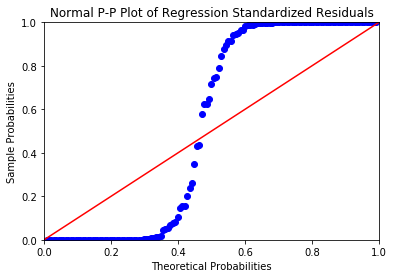

In [63]:
draw_pp_plot( adv_model_2, "Normal P-P Plot of Regression Standardized Residuals");

#Plotting graph for PP plot

In [64]:
k = train_X.shape[1]
n = train_X.shape[0]

print( "Number of variables:", k, " and number of observations:", n)

Number of variables: 6  and number of observations: 137


In [65]:
k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 6  and number of observations: 137
Cutoff for leverage value:  0.153


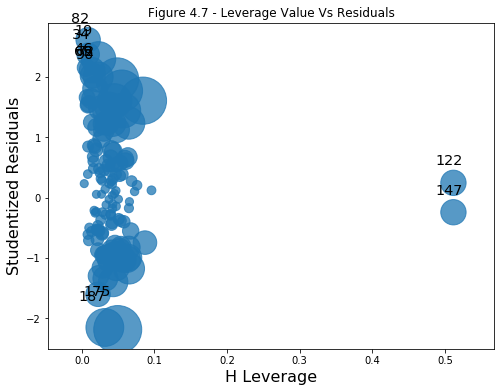

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( adv_model_2, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [72]:
adv[adv.index.isin( [147, 122] )]

,Sno,TV,Radio,Newspaper,Day,Sales
122,123,224.0,2.4,15.6,Holiday,8.5
147,148,243.2,49.0,44.3,Holiday,15.0


In [73]:
train_X_new = train_X.drop( [122, 147], axis = 0)
train_y_new = train_y.drop( [122, 147], axis = 0)

In [71]:
import numpy as np
train_y = np.sqrt( train_y )

In [74]:
adv_model_3 = sm.OLS(train_y, train_X).fit()
adv_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.905   
Dependent Variable:     Sales            AIC:                         433.9164
Date:                   2020-08-12 17:51 BIC:                         451.4363
No. Observations:       137              Log-Likelihood:              -210.96 
Df Model:               6                F-statistic:                 219.0   
Df Residuals:           131              Prob (F-statistic):          9.63e-66
R-squared (uncentered): 0.909            Scale:                       1.3319  
---------------------------------------------------------------------------------
                    Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
---------------------------------------------------------------------------------
Day_Holiday        -1.5918      0.8409    -1.8930    0.0606    -3.2552     0.0717
Sno                 0.0104      0.0015     7.0459    0.0000     0.0075     0.0133
TV                  0.0103      0.0014     7.1731    0.0000     0.0074     0.0131
Day_Weekend        -1.0312      0.3188    -3.2349    0.0015    -1.6618    -0.4006
Radio               0.0289      0.0068     4.2417    0.0000     0.0154     0.0424
Newspaper           0.0146      0.0052     2.8097    0.0057     0.0043     0.0248
------------------------------------------------------------------------------
Omnibus:                   2.512            Durbin-Watson:               1.965
Prob(Omnibus):             0.285            Jarque-Bera (JB):            1.946
Skew:                      0.133            Prob(JB):                    0.378
Kurtosis:                  2.481            Condition No.:               1712 
==============================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

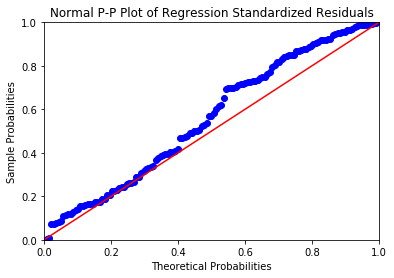

In [75]:
draw_pp_plot( adv_model_3,"Normal P-P Plot of Regression Standardized Residuals");

In [76]:
pred_y = np.power(adv_model_3.predict( test_X[train_X.columns] ), 2)

In [78]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

10.993617996894153